# WHO data Clustering


In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

### How does the data look like?

/var/folders/tf/_y80j961435b_fpnkg57_p8c0000gn/T/ipykernel_88251/297642897.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


<module 'matplotlib.pyplot' from '/Users/rayaneghilene/Documents/Ollama/lib/python3.9/site-packages/matplotlib/pyplot.py'>

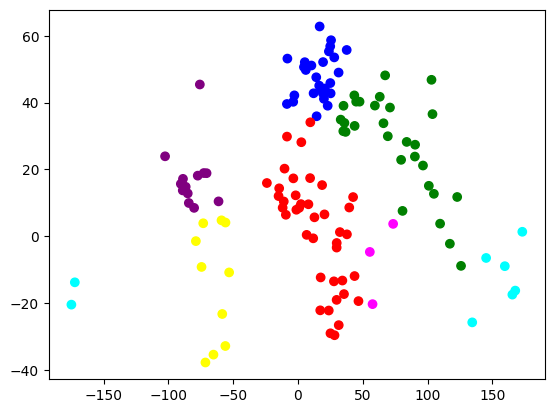

In [5]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt

## K-Means Clustering

<module 'matplotlib.pyplot' from '/Users/rayaneghilene/Documents/Ollama/lib/python3.9/site-packages/matplotlib/pyplot.py'>

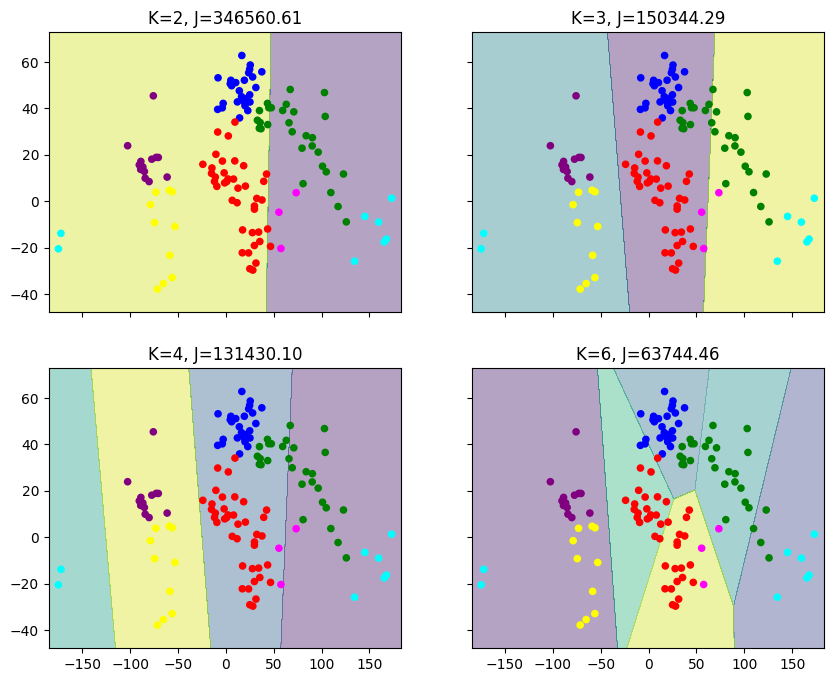

In [6]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

## STEP 2: Spatial dataset normalization

/var/folders/tf/_y80j961435b_fpnkg57_p8c0000gn/T/ipykernel_88251/3248688378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'] + 30


<module 'matplotlib.pyplot' from '/Users/rayaneghilene/Documents/Ollama/lib/python3.9/site-packages/matplotlib/pyplot.py'>

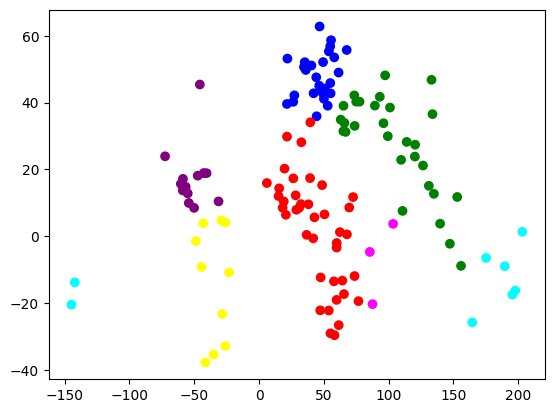

In [7]:
#displace th origin of longitude to 30 to east
df_X['Longitude'] = df_X['Longitude'] + 30
np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt


## KMeans on new normalized dataset.

<module 'matplotlib.pyplot' from '/Users/rayaneghilene/Documents/Ollama/lib/python3.9/site-packages/matplotlib/pyplot.py'>

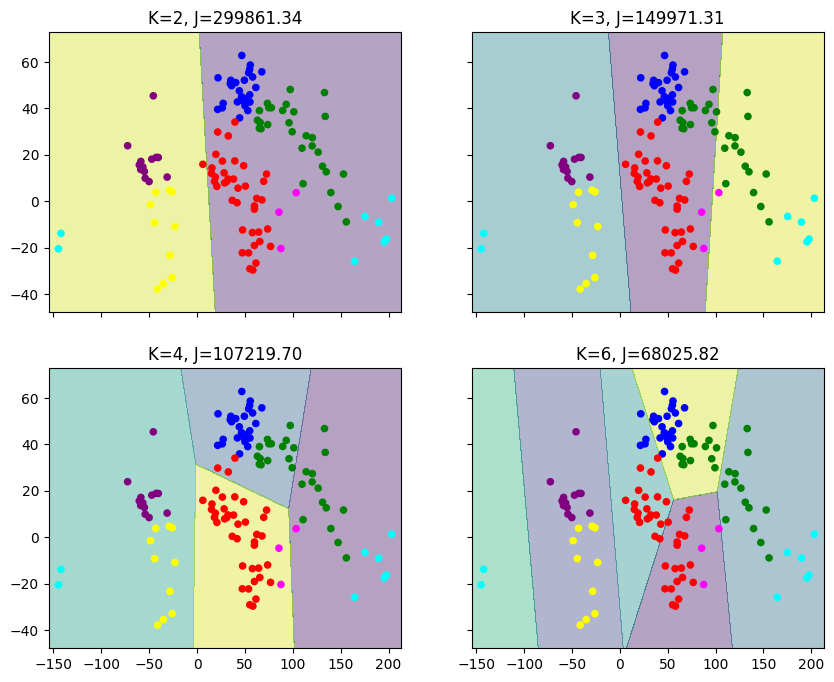

In [8]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

## GMM to the normalized dataset.

We have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

We will calculate the Akaike information criterion (AIC) and Bayesian information criterion (BIC) in order to compare the three models

AIC is computed as 

$AIC = -2 ln(L^{0}(M))+2k+\frac{2k(k+1)}{N-k-1}$

BIC is computed as

$BIC = -2 ln[L^{0}(M)]+kln(N)$

The Best Gaussian Mixture model is the one with 2  components


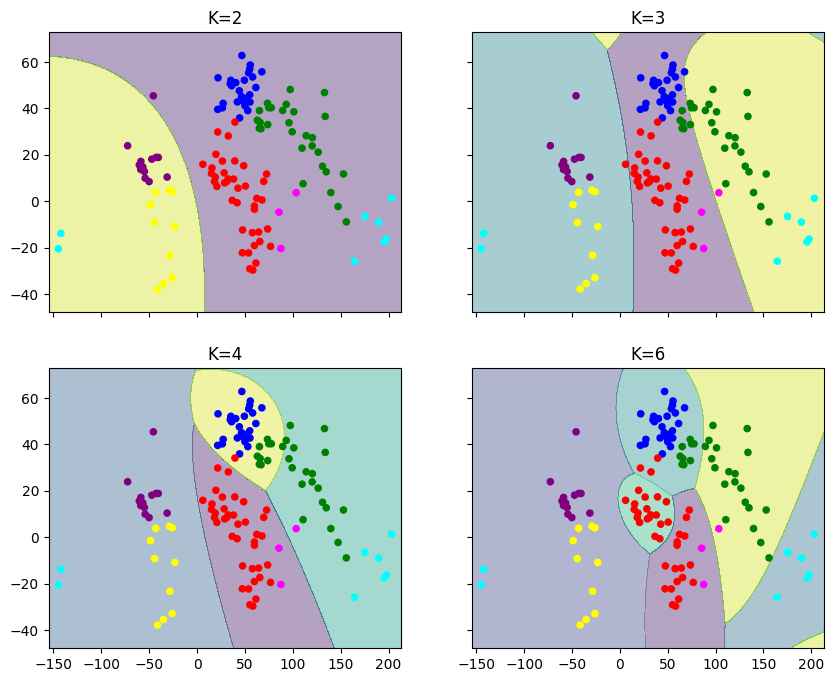

In [9]:
# calculate - GMM with default parameters for 2, 3, 4 and 6 components
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(np1)
gm2 = GaussianMixture(n_components=3, random_state=0).fit(np1)
gm3 = GaussianMixture(n_components=4, random_state=0).fit(np1)
gm4 = GaussianMixture(n_components=6, random_state=0).fit(np1)


aic = []
bic = []

# calculate AIC and BIC
gm_aic = gm.aic(np1)
gm_bic = gm.bic(np1)
aic.append(gm_aic)
bic.append(gm_bic)

gm_aic2 = gm2.aic(np1)
gm_bic2 = gm2.bic(np1)
aic.append(gm_aic2)
bic.append(gm_bic2)

gm_aic3 = gm3.aic(np1)
gm_bic3 = gm3.bic(np1)
aic.append(gm_aic3)
bic.append(gm_bic3)


gm_aic4 = gm4.aic(np1)
gm_bic4 = gm4.bic(np1)
aic.append(gm_aic4)
bic.append(gm_bic4)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, g, tt in zip(product([0, 1], [0, 1]),
                        [gm, gm2, gm3, gm4],
                        ["K=2", "K=3" ,"K=4" ,"K=6"]):

    Z = g.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

# print the name of the best model
k = np.argmax(bic)
z =0
if k == 0: z = 2 
elif k == 1: z = 3
elif k == 2: z = 4
else: z == 6
print("The Best Gaussian Mixture model is the one with", z, " components")

The Best Gaussian Mixture model with the diagonal covarniance is the one with 2  components


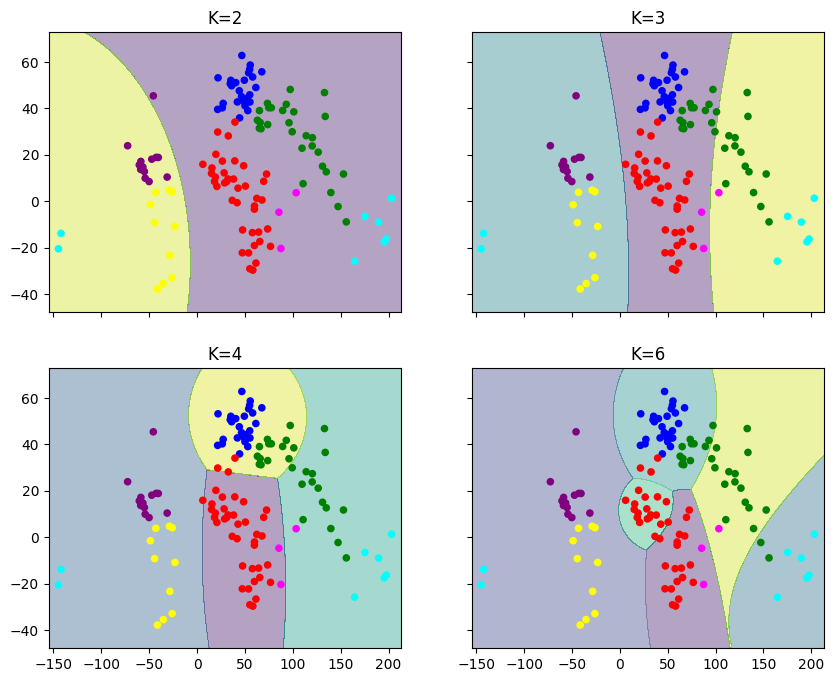

In [10]:
# caluculate GMM with diagonal covariance matrix for 2, 3, 4 and 6 components
gm = GaussianMixture(n_components=2, covariance_type='diag', random_state=0).fit(np1)
gm2 = GaussianMixture(n_components=3, covariance_type='diag', random_state=0).fit(np1)
gm3 = GaussianMixture(n_components=4, covariance_type='diag', random_state=0).fit(np1)
gm4 = GaussianMixture(n_components=6, covariance_type='diag', random_state=0).fit(np1)


aic1 = []
bic1 = []

# calculate AIC and BIC
gm_aic = gm.aic(np1)
gm_bic = gm.bic(np1)
aic1.append(gm_aic)
bic1.append(gm_bic)

gm_aic2 = gm2.aic(np1)
gm_bic2 = gm2.bic(np1)
aic1.append(gm_aic2)
bic1.append(gm_bic2)

gm_aic3 = gm3.aic(np1)
gm_bic3 = gm3.bic(np1)
aic1.append(gm_aic3)
bic1.append(gm_bic3)


gm_aic4 = gm4.aic(np1)
gm_bic4 = gm4.bic(np1)
aic1.append(gm_aic4)
bic1.append(gm_bic4)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, g, tt in zip(product([0, 1], [0, 1]),
                        [gm, gm2, gm3, gm4],
                        ["K=2", "K=3" ,"K=4" ,"K=6"]):

    Z = g.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

# print the name of the best model
k = np.argmax(bic1)
z =0
if k == 0: z = 2 
elif k == 1: z = 3
elif k == 2: z = 4
else: z == 6
print("The Best Gaussian Mixture model with the diagonal covarniance is the one with", z, " components")

The Best Gaussian Mixture model with randomly initialized paramters is the one with 4  components


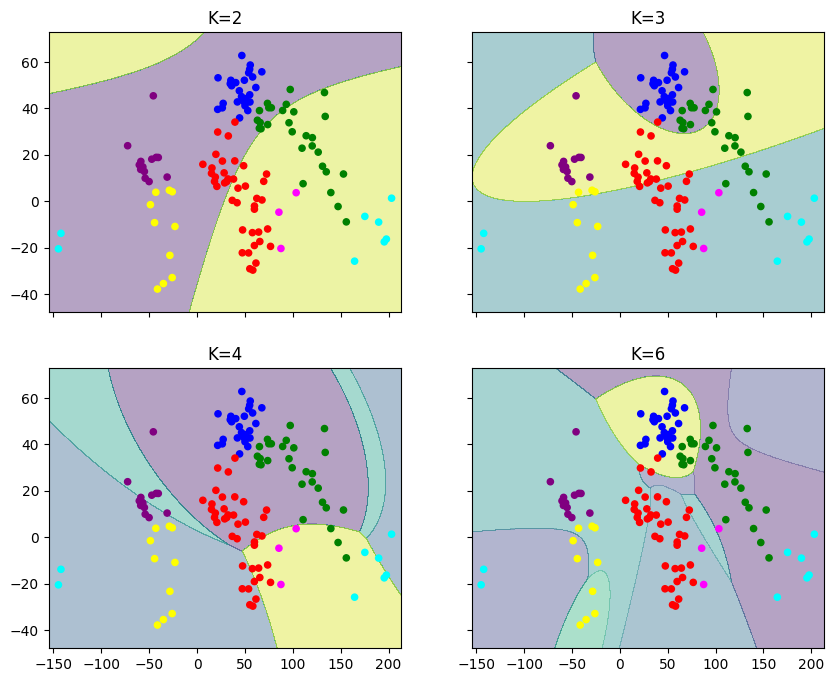

In [11]:
# calculate GMM with random initialization for 2, 3, 4 and 6 components
gm = GaussianMixture(n_components=2, init_params='random', random_state=0).fit(np1)
gm2 = GaussianMixture(n_components=3, init_params='random', random_state=0).fit(np1)
gm3 = GaussianMixture(n_components=4, init_params='random', random_state=0).fit(np1)
gm4 = GaussianMixture(n_components=6, init_params='random', random_state=0).fit(np1)


aic2 = []
bic2 = []

# calculate AIC and BIC
gm_aic = gm.aic(np1)
gm_bic = gm.bic(np1)
aic2.append(gm_aic)
bic2.append(gm_bic)

gm_aic2 = gm2.aic(np1)
gm_bic2 = gm2.bic(np1)
aic2.append(gm_aic2)
bic2.append(gm_bic2)

gm_aic3 = gm3.aic(np1)
gm_bic3 = gm3.bic(np1)
aic2.append(gm_aic3)
bic2.append(gm_bic3)


gm_aic4 = gm4.aic(np1)
gm_bic4 = gm4.bic(np1)
aic2.append(gm_aic4)
bic2.append(gm_bic4)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, g, tt in zip(product([0, 1], [0, 1]),
                        [gm, gm2, gm3, gm4],
                        ["K=2", "K=3" ,"K=4" ,"K=6"]):

    Z = g.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

# print the name of the best model
k = np.argmax(bic2)
z =0
if k == 0: z = 2 
elif k == 1: z = 3
elif k == 2: z = 4
else: z == 6
print("The Best Gaussian Mixture model with randomly initialized paramters is the one with", z, " components")

### Which is the best method to detect continents?

In [12]:
z  = np.argmax(bic)
z1 = np.argmax(bic1)
z2 = np.argmax(bic2)
BIC = bic + bic1 + bic2
z3 = np.argmax(BIC)
if z3 in bic: k = z3
elif z3 in bic1: k = z3 - 4
else: k = z3 - 8
if k == 0: z = 2 
elif k == 1: z = 3
elif k == 2: z = 4
else: z == 6

print("the model with the best BIC is the one with", z, " components")

the model with the best BIC is the one with 4  components


For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?


In [13]:
# calculate the probability of the point [-50, -40] for each component
gm4.predict_proba([[-50, -40]])

array([[2.54053491e-38, 9.95192651e-06, 8.16312316e-17, 2.23539846e-06,
        9.99987813e-01, 3.98750305e-39]])

## Alternative normalisation method 
We could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

In [14]:
from sklearn.cluster import KMeans
kmeans_cos = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(np1)

## STEP 3: Detection of caribbean island 

1. Isolate the North and South American continents.

In [15]:
#Isolate the North and South American continents.
df2 = df[(df.Continent == 'North America') | (df.Continent == 'South America')]
df2.head()

,Country,Longitude,Latitude,Continent,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
81,Argentina,-65.179807,-35.381349,South America,2014,Developing,76.2,118.0,8,7.93,...,92.0,4.79,94.0,0.1,12245.25645,42981515.0,1.0,0.9,0.825,17.3
82,Argentina,-65.179807,-35.381349,South America,2013,Developing,76.0,119.0,8,8.28,...,99.0,4.99,94.0,0.1,12976.63642,42539925.0,1.0,0.9,0.823,17.3
83,Argentina,-65.179807,-35.381349,South America,2012,Developing,75.9,12.0,9,8.35,...,99.0,5.20,91.0,0.1,12969.77120,4296739.0,1.0,0.9,0.822,17.2
84,Argentina,-65.179807,-35.381349,South America,2011,Developing,75.7,12.0,9,8.11,...,93.0,5.89,91.0,0.1,12726.98360,41656879.0,1.0,0.9,0.816,17.1
85,Argentina,-65.179807,-35.381349,South America,2010,Developing,75.5,121.0,10,8.15,...,95.0,6.55,94.0,0.1,1276.26500,41223889.0,1.0,0.9,0.802,16.8


2. create a cluster including caribbean independent nations.

/Users/rayaneghilene/Documents/Ollama/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/var/folders/tf/_y80j961435b_fpnkg57_p8c0000gn/T/ipykernel_88251/1296048397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster'] = caribbean_cluster


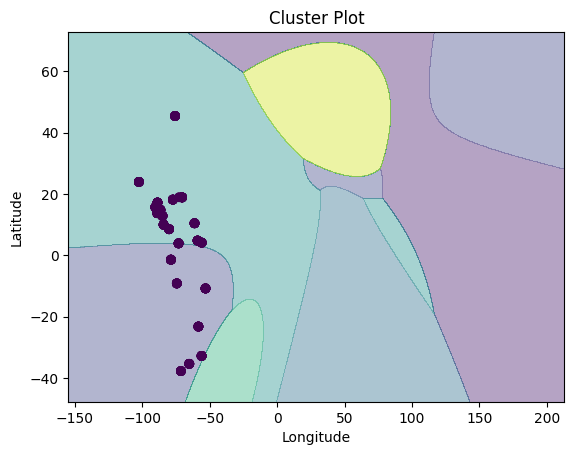

In [21]:
caribbean_cluster = kmeans_cos.predict(df2[['Longitude', 'Latitude']])
df2['Cluster'] = caribbean_cluster
df2.head()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(df2['Longitude'], df2['Latitude'], c=df2['Cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Plot')
plt.show()


We can clearly see an outlier in the clusters, the point with $Lattitude > 40$ and $Longitude < 50$

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

/var/folders/tf/_y80j961435b_fpnkg57_p8c0000gn/T/ipykernel_88251/393114947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'] + 30
/var/folders/tf/_y80j961435b_fpnkg57_p8c0000gn/T/ipykernel_88251/393114947.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


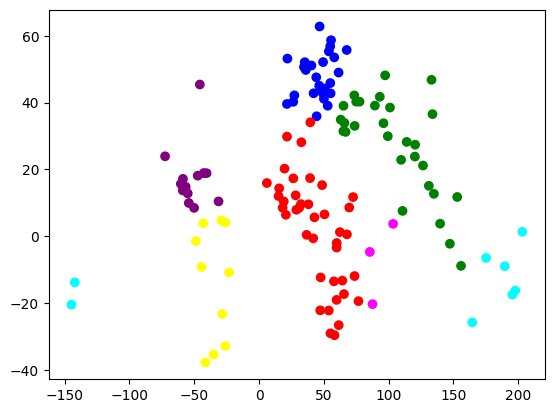

In [28]:
df_X = df1[['Longitude', 'Latitude']]
df_X['Longitude'] = df_X['Longitude'] + 30
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()


In [29]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5294149389828594


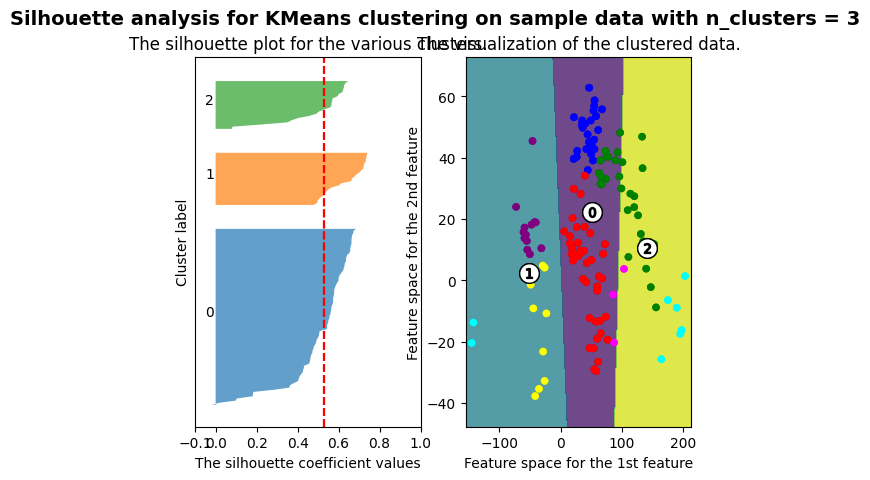

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km3 = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km3.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km3.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km3.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### For k = 2

For n_clusters = 2 The average silhouette_score is : 0.5342317632135227


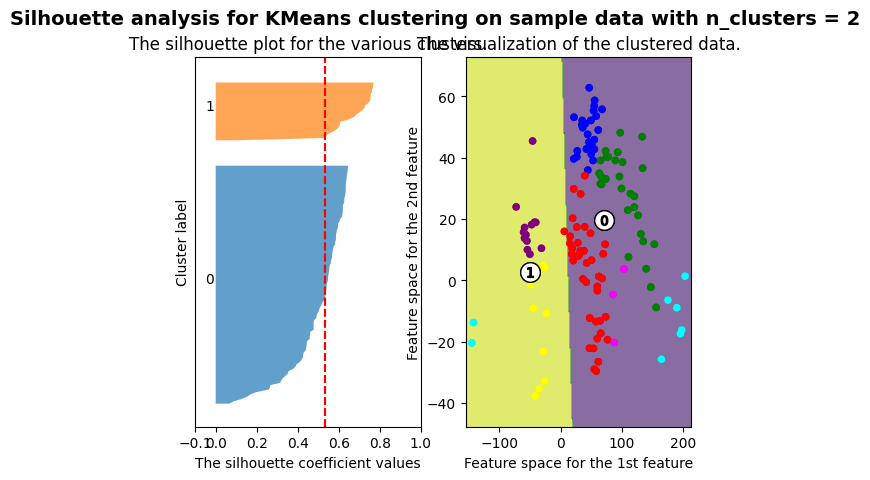

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 2

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km2 = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km2.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km2.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### For K = 4

For n_clusters = 4 The average silhouette_score is : 0.4790634593010831


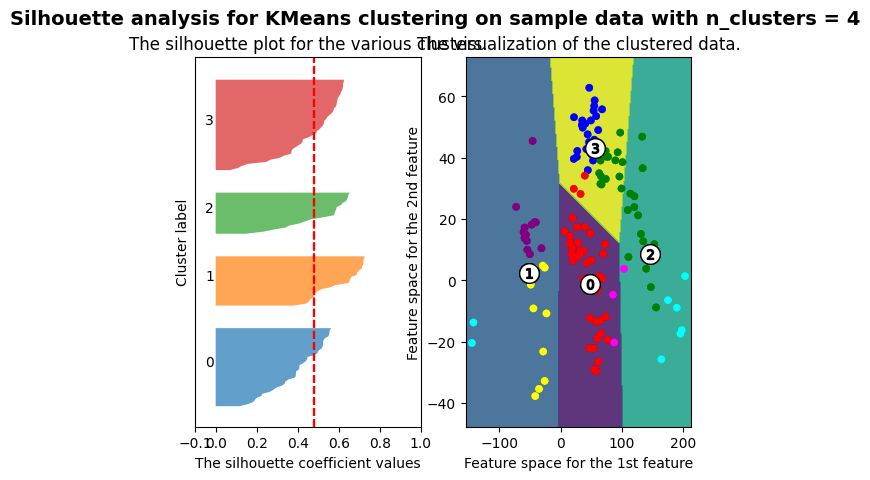

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 4

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km4 = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km4.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km4.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km4.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### For k = 6

For n_clusters = 6 The average silhouette_score is : 0.5064116980604946


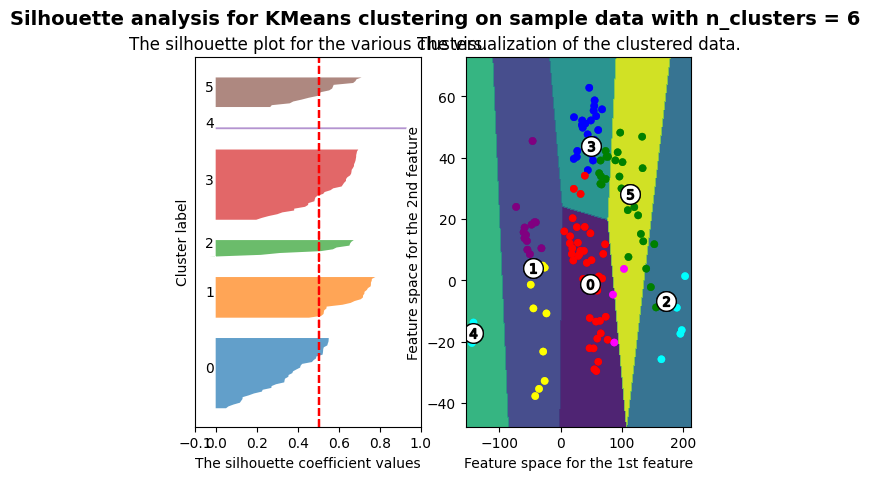

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 6

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km6 = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km6.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km6.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km6.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Silhouette score

In [34]:
# compoute the silhouette score
from sklearn.metrics import silhouette_score
print("the shillouette score for k = 2 is: ", silhouette_score(np1, km2.labels_))
print("the shillouette score for k = 3 is: ", silhouette_score(np1, km3.labels_))
print("the shillouette score for k = 4 is: ", silhouette_score(np1, km4.labels_))
print("the shillouette score for k = 6 is: ", silhouette_score(np1, km6.labels_))


the shillouette score for k = 2 is:  0.5342317632135227
the shillouette score for k = 3 is:  0.5294149389828594
the shillouette score for k = 4 is:  0.4790634593010831
the shillouette score for k = 6 is:  0.5064116980604946


### Homogeneity score
Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. We Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

In [36]:
# compoute the homgeneity score
from sklearn.metrics import homogeneity_score
print("the homogeneity score for k = 2 is", homogeneity_score(np_Y, km2.labels_))
print("the homogeneity score for k = 3 is", homogeneity_score(np_Y, km3.labels_))
print("the homogeneity score for k = 4 is", homogeneity_score(np_Y, km4.labels_))
print("the homogeneity score for k = 6 is", homogeneity_score(np_Y, km6.labels_))

the homogeneity score for k = 2 is 0.2513787294486741
the homogeneity score for k = 3 is 0.41607303047189803
the homogeneity score for k = 4 is 0.6165380260544358
the homogeneity score for k = 6 is 0.7076320220915931


**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

In [71]:
## Test of other metrics

#completeness score
from sklearn.metrics import completeness_score
print("the completeness score is", completeness_score(np_Y, km3.labels_))
#V-measure
from sklearn.metrics import v_measure_score
print("the v_measure score is", v_measure_score(np_Y, km3.labels_))
#adjusted rand score
from sklearn.metrics import adjusted_rand_score
print("the adjusted_rand score is", adjusted_rand_score(np_Y, km3.labels_))
#adjusted mutual info score
from sklearn.metrics import adjusted_mutual_info_score
print("the adjusted_mutual_info score is", adjusted_mutual_info_score(np_Y, km3.labels_))

#calinski harabasz score
from sklearn.metrics import calinski_harabasz_score
print("the calinski_harabasz_score score is", calinski_harabasz_score(np1, km3.labels_))
#davies bouldin score
from sklearn.metrics import davies_bouldin_score
print("the davies_bouldin score is", davies_bouldin_score(np1, km3.labels_))
#fowlkes mallows score
from sklearn.metrics import fowlkes_mallows_score
print("the fowlkes_mallows score is", fowlkes_mallows_score(np_Y, km3.labels_))


the completeness score is 0.7782397440491807
the v_measure score is 0.5422441686099573
the adjusted_rand score is 0.3436542377582179
the adjusted_mutual_info score is 0.523451749788059
the calinski_harabasz_score score is 195.8065346273147
the davies_bouldin score is 0.6492153158276444
the fowlkes_mallows score is 0.5739448770666958


### The works presented in this notebook were supervised by by Clément Bouvier 